# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

# Оглавление<a name="Оглавление"></a>

- 1. [Подготовка данных](#Подготовка)
  - 1.1. [Вывод по подготовке](#подготовке)
- 2. [Проверка правильности расчета эффективности обогащения](#Проверка)
  - 2.1. [Вывод по формуле](#формуле)
  - 2.2. [Анализ признаков, недоступных в тестовой выборке](#Анализ)
  - 2.3. [ Вывод по анализу признаков](#Вывод_по)
- 3. [Предобработка данных](#Предобработка)
  - 3.1. [Общий вывод по подготовке данных](#Общий)
- 4. [Анализ данных](#Анализ_данных)
  - 4.1. [Bывод по анализу](#Bывод_анализу)
  - 4.2. [Построим гистаграммы по каждой из руд](#Построим)
    - 4.2.1. [Bывод по гистограммам](#Bывод_гистограммам)
    - 4.2.2. [Bывод по графику](#Bывод_графику)
    - 4.2.3. [Bывод по графику](#Bыводпографику)
  - 4.3. [Вывод по анализу данных](#Выводанализуданных)
- 5. [Сравнение моделей](#Сравнение_моделей)
  - 5.1. [LinearRegression](#LinearRegression)
  - 5.2. [DecisionTreeRegressor](#DecisionTreeRegressor)
  - 5.3. [RandomForestRegressor](#RandomForestRegressor)
- 6. [Сравнение с константной моделью](#Сравнение)
- 7. [Вывод](#Вывод)

## 1. Подготовка данных<a name="Подготовка"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import  make_pipeline

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer

from sklearn.model_selection import cross_validate
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
data_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
data_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
data_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')

In [3]:
display(data_train.info())
display(data_train.head())

display(data_test.info())
display(data_test.head())

display(data_full.info())
data_full.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


None

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

None

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


None

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


[К оглавлению](#Оглавление)

### 1.1 Вывод по подготовке<a name="подготовке"></a>

- Во всех датафреймах имеются пропущенные значения

- Во всех датафреймах значения записаны в формате float, кроме данных в столбце date

## 2. Проверка правильности расчета эффективности обогащения<a name="Проверка"></a>

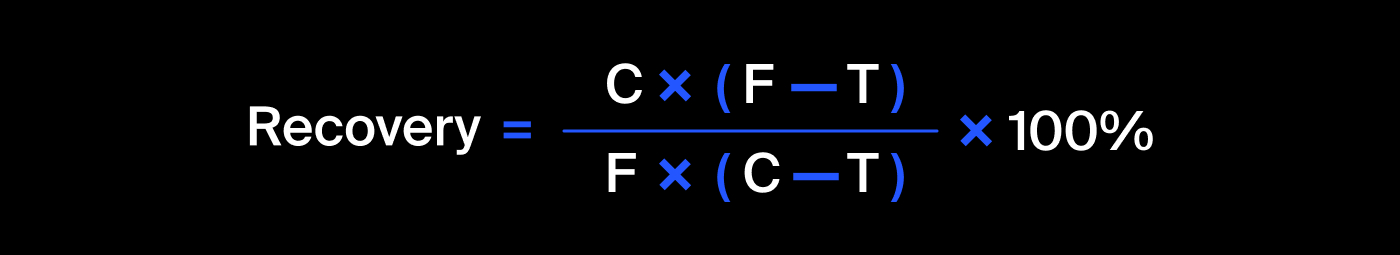

где:
- C — доля золота в концентрате после флотации/очистки;
- F — доля золота в сырье/концентрате до флотации/очистки;
- T — доля золота в отвальных хвостах после флотации/очистки.

Выведем нужные значения в отдельную таблицу

In [4]:
gold_recovery_train_verification = data_train[['rougher.output.concentrate_au', 'rougher.output.recovery', 'rougher.input.feed_au', 'rougher.output.tail_au']]
gold_recovery_train_verification.head()

,rougher.output.concentrate_au,rougher.output.recovery,rougher.input.feed_au,rougher.output.tail_au
0,19.793808,87.107763,6.486150,1.170244
1,20.050975,86.843261,6.478583,1.184827
2,19.737170,86.842308,6.362222,1.162562
3,19.320810,87.226430,6.118189,1.079755
4,19.216101,86.688794,5.663707,1.012642


Подставим значения из таблицы в формулу

In [5]:
rougher_output_recovery_calc = (
    ((gold_recovery_train_verification['rougher.output.concentrate_au'] * 
         (gold_recovery_train_verification['rougher.input.feed_au'] - 
          gold_recovery_train_verification['rougher.output.tail_au'])
    ) / 
        (gold_recovery_train_verification['rougher.input.feed_au'] * 
         (gold_recovery_train_verification['rougher.output.concentrate_au'] - 
          gold_recovery_train_verification['rougher.output.tail_au']))) * 100
)

mean_absolute_error(rougher_output_recovery_calc, gold_recovery_train_verification['rougher.output.recovery'])

9.73512347450521e-15

[К оглавлению](#Оглавление)

### 2.1. Вывод по формуле<a name="формуле"></a>

- Параметр recovery в train рассчитаны верно

### 2.2. Анализ признаков, недоступных в тестовой выборке<a name="Анализ"></a>

Посмотрим отсутствующие столбы

In [6]:
test_missing_columns = list(set(data_train.columns) - set(data_test.columns))
test_missing_columns

['rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.tail_pb',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'primary_cleaner.output.concentrate_pb',
 'rougher.output.tail_au',
 'final.output.tail_pb',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.concentrate_au',
 'rougher.output.tail_ag',
 'secondary_cleaner.output.tail_ag',
 'rougher.output.recovery',
 'final.output.concentrate_pb',
 'secondary_cleaner.output.tail_sol',
 'final.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'primary_cleaner.output.tail_sol',
 'final.output.recovery',
 'final.output.tail_au',
 'rougher.output.concentrate_sol',
 'final.output.concentrate_au',
 'secondary_cleaner.output.tail_au',
 'final.output.concentrate_ag',
 'rougher.output.concentrate_ag',
 'primary_cleaner.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'final.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'primary_cleaner.

[К оглавлению](#Оглавление)

### 2.3 Вывод по анализу признаков<a name="Вывод_по"></a>
- почти все признаки, не вошедшие в тестовую выборку, являются промежуточными, их можно исключить и из обучающей выборки
- признаки final.output.recovery и rougher.output.recovery являются целевыми, их необходимо добавить в тестовую выборку из полного датафрейма

[К оглавлению](#Оглавление)

## 3. Предобработка данных<a name="Предобработка"></a>

Проверим на дубликаты

In [7]:
data_train['date'].duplicated().sum()

0

In [8]:
data_test['date'].duplicated().sum()

0

In [9]:
data_full['date'].duplicated().sum()

0

Проверим количесто пропусков

In [10]:
print('Количество строк с пропусками в data_train', data_train.isna().sum().sum())
print('Количество строк с пропусками в data_test', data_test.isna().sum().sum())
print('Количество строк с пропусками в data_full', data_full.isna().sum().sum())

Количество строк с пропусками в data_train 4100
Количество строк с пропусками в data_test 90
Количество строк с пропусками в data_full 4481


Заполним пропуски ближайшими значениями, так как соседние по времени данные похожи

In [11]:
data_train = data_train.fillna(method='ffill')
data_test = data_test.fillna(method='ffill')
data_full = data_full.fillna(method='ffill')

Проверим количесто оставшихся пропусков

In [12]:
print('Количество строк с пропусками в data_train', data_train.isna().sum().sum())
print('Количество строк с пропусками в data_test', data_test.isna().sum().sum())
print('Количество строк с пропусками в data_full', data_full.isna().sum().sum())

Количество строк с пропусками в data_train 0
Количество строк с пропусками в data_test 0
Количество строк с пропусками в data_full 0


[К оглавлению](#Оглавление)

## 3.1. Общий вывод по подготовке данных<a name="Общий"></a>

- во всех датафреймах значения записаны в формате float, кроме данных в столбце date
- расчётная эффективность обогащения подсчитана правильно
- из выборок удалены промежуточные признаки
- в тестовую выборку добавлены значения целевых признаков
- явных дубликатов в выборках не обнаружено
- пропущенные значения в выборках обработаны

## 4. Анализ данных<a name="Анализ_данных"></a>

In [13]:
print('Концентрация до флотации')
print('Концентрация Серебра:', data_full["rougher.input.feed_ag"].mean(),'Свинца:', data_full["rougher.input.feed_pb"].mean() ,'Золота:', data_full["rougher.input.feed_au"].mean())
print()
print('Концентрация после флотации')
print('Коцентрация Серебра:', data_full["rougher.output.concentrate_ag"].mean(),'Свинца:',data_full["rougher.output.concentrate_pb"].mean(),'Золота:', data_full["rougher.output.concentrate_au"].mean())
print()
print('Концентрация после первичной очистки')
print('Концентрация Серебра:', data_full["primary_cleaner.output.concentrate_ag"].mean(),'Свинца:',data_full["primary_cleaner.output.concentrate_pb"].mean(),'Золота:', data_full["primary_cleaner.output.concentrate_au"].mean())
print()
print('Концентрация поле вторичной очистки')
print('Концентрация Серебра:', data_full["final.output.concentrate_ag"].mean(),'Свинца:', data_full["final.output.concentrate_pb"].mean(),'Золота:', data_full["final.output.concentrate_au"].mean())

Концентрация до флотации
Концентрация Серебра: 8.794927425814688 Свинца: 3.585095711585748 Золота: 8.266097326589103

Концентрация после флотации
Коцентрация Серебра: 11.994759359873429 Свинца: 7.606272313195003 Золота: 19.772000139486316

Концентрация после первичной очистки
Концентрация Серебра: 8.44240807771906 Свинца: 9.810316539310149 Золота: 32.1194004078765

Концентрация поле вторичной очистки
Концентрация Серебра: 5.168386967510243 Свинца: 9.978821384192907 Золота: 44.0765129419528


[К оглавлению](#Оглавление)

### 4.1. Bывод по анализу<a name="Bывод_анализу"></a>
- После каждого этапа очистки концентрация золота значительно возрастает
- концентрация серебра повысилась только после флотации, на последующих этапах очистки прослеживается тенденция к снижению. Возможно, больше металла ушло в "хвосты"
- Концентрация свинца значительно повысилась после флотации, при последующей очистке повышение не такое явное

## 4.2. Построим гистаграммы по каждой из руд <a name="Построим"></a>

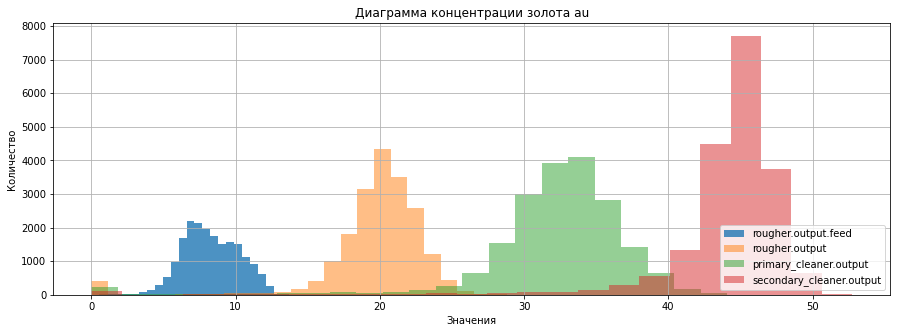

In [14]:
plt.figure(figsize=(15,5))

data_full['rougher.input.feed_au'].hist(bins=25, label='rougher.output.feed', alpha=0.8)
data_full['rougher.output.concentrate_au'].hist(bins=25, label='rougher.output', alpha=0.5)
data_full['primary_cleaner.output.concentrate_au'].hist(bins=25, label='primary_cleaner.output', alpha=0.5)
data_full['final.output.concentrate_au'].hist(bins=25, label='secondary_cleaner.output', alpha=0.5)

plt.title('Диаграмма концентрации золота au')
plt.xlabel('Значения')
plt.ylabel('Количество')
plt.legend(loc='lower right')
plt.show()

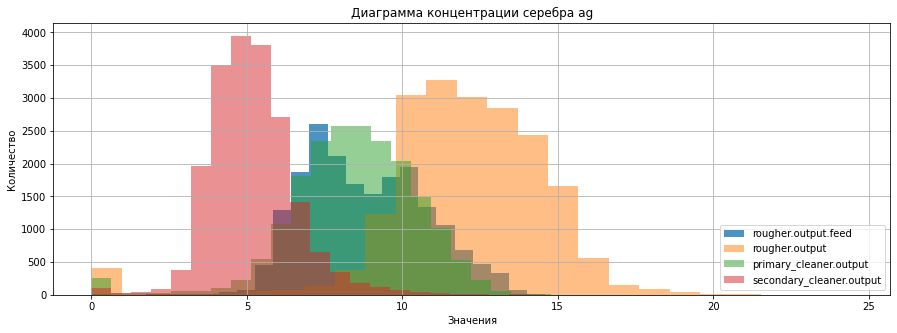

In [15]:
plt.figure(figsize=(15,5))

data_full['rougher.input.feed_ag'].hist(bins=25, label='rougher.output.feed', alpha=0.8)
data_full['rougher.output.concentrate_ag'].hist(bins=25, label='rougher.output', alpha=0.5)
data_full['primary_cleaner.output.concentrate_ag'].hist(bins=25, label='primary_cleaner.output', alpha=0.5)
data_full['final.output.concentrate_ag'].hist(bins=25, label='secondary_cleaner.output', alpha=0.5)

plt.title('Диаграмма концентрации серебра ag')
plt.legend(loc='lower right')
plt.xlabel('Значения')
plt.ylabel('Количество')
plt.show()

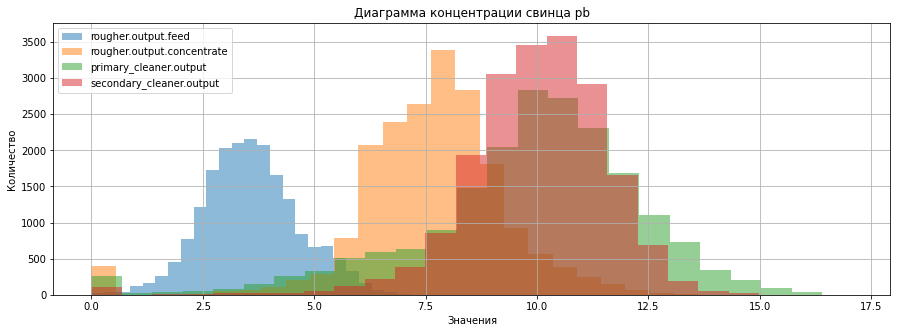

In [16]:
plt.figure(figsize=(15,5))

data_full['rougher.input.feed_pb'].hist(bins=25, label='rougher.output.feed', alpha=0.5)
data_full['rougher.output.concentrate_pb'].hist(bins=25, label='rougher.output.concentrate', alpha=0.5)
data_full['primary_cleaner.output.concentrate_pb'].hist(bins=25, label='primary_cleaner.output', alpha=0.5)
data_full['final.output.concentrate_pb'].hist(bins=25, label='secondary_cleaner.output', alpha=0.5)
plt.title('Диаграмма концентрации свинца pb')

plt.legend(loc='upper left')
plt.xlabel('Значения')
plt.ylabel('Количество')
plt.show()

[К оглавлению](#Оглавление)

### 4.2.1. Bывод по гистограммам <a name="Bывод_гистограммам"></a>
- После каждого этапа очистки концентрация золота значительно возрастает
- концентрация серебра повысилась только после флотации, на последующих этапах очистки прослеживается тенденция к снижению. Возможно, больше металла ушло в "хвосты"
- Концентрация свинца значительно повысилась после флотации, при последующей очистке повышение не такое явное

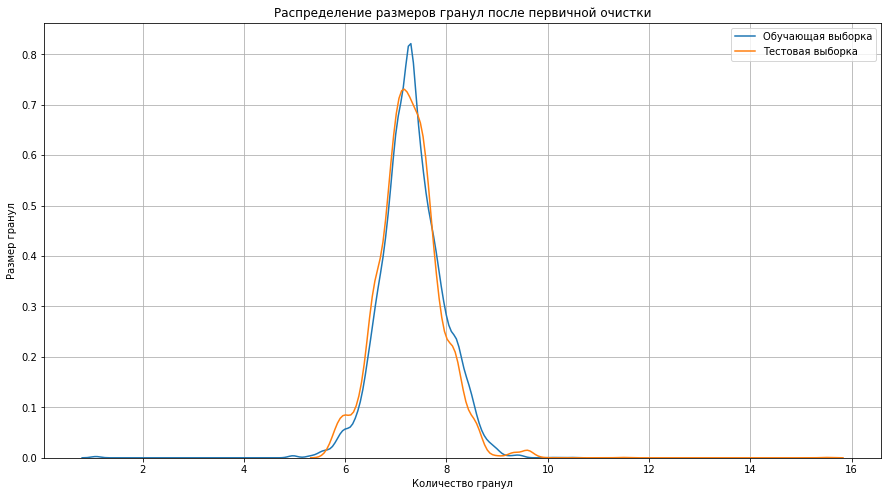

In [17]:
plt.figure(figsize=(15,8))
sns.kdeplot(data_train['primary_cleaner.input.feed_size'], label='Обучающая выборка')
sns.kdeplot(data_test['primary_cleaner.input.feed_size'], label='Тестовая выборка')
plt.title("Распределение размеров гранул после первичной очистки")
plt.xlabel("Количество гранул")
plt.ylabel("Размер гранул")
plt.grid(True)
plt.legend()
plt.show;

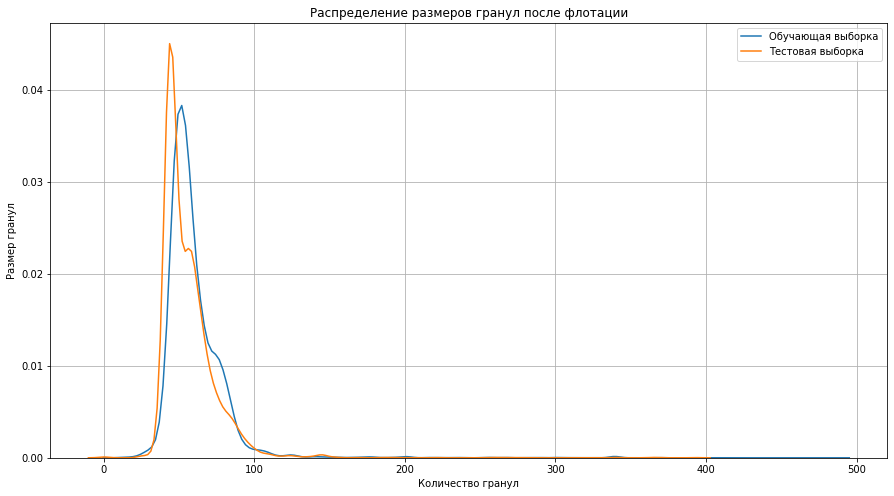

In [18]:
plt.figure(figsize=(15,8))
sns.kdeplot(data_train['rougher.input.feed_size'], label='Обучающая выборка')
sns.kdeplot(data_test['rougher.input.feed_size'], label='Тестовая выборка')
plt.title("Распределение размеров гранул после флотации")
plt.xlabel("Количество гранул")
plt.ylabel("Размер гранул")
plt.grid(True)
plt.legend()
plt.show();

[К оглавлению](#Оглавление)

#### 4.2.2. Bывод по графику<a name="Bывод_графику"></a>
- Распределения размеров гранул сырья в выборках схожи, никаких корректировок вносить не требуется

Обьединим по этапам очистки 

In [19]:
rougher_input_data = (
        data_train['rougher.input.feed_au'] + 
        data_train['rougher.input.feed_ag'] + 
        data_train['rougher.input.feed_pb']
    )

rougher_output_data = (
        data_train['rougher.output.concentrate_au'] +
        data_train['rougher.output.concentrate_ag'] +
        data_train['rougher.output.concentrate_pb']
    )

primary_cleaner_output_data = (
        data_train['primary_cleaner.output.concentrate_au'] +
        data_train['primary_cleaner.output.concentrate_ag'] +
        data_train['primary_cleaner.output.concentrate_pb']
    )

final_output_data = (
        data_train['final.output.concentrate_au'] +
        data_train['final.output.concentrate_ag'] +
        data_train['final.output.concentrate_pb']
    )

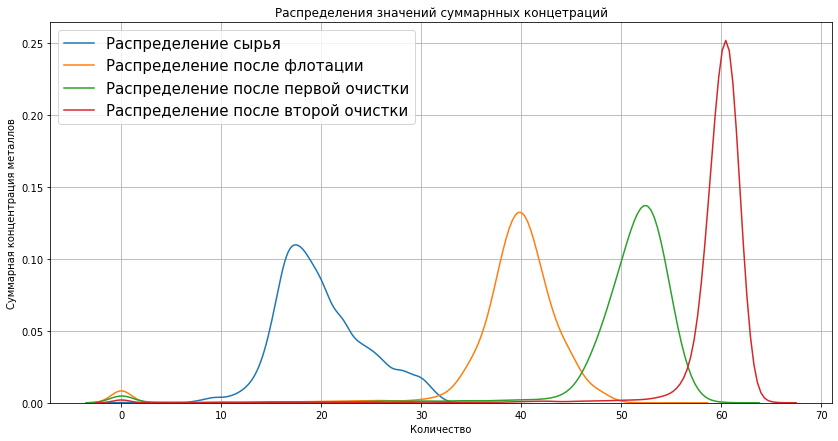

In [20]:
plt.subplots(figsize=(14, 7))

sns.kdeplot(label='Распределение сырья',
            data=rougher_input_data);

sns.kdeplot(label='Распределение после флотации',
            data=rougher_output_data);

sns.kdeplot(label='Распределение после первой очистки',
            data=primary_cleaner_output_data);

sns.kdeplot(label='Распределение после второй очистки',
            data=final_output_data);

plt.legend(fontsize = 15)
plt.title("Распределения значений суммарнных концетраций")
plt.xlabel("Количество")
plt.ylabel("Суммарная концентрация металлов")
plt.grid(True)
plt.show;

[К оглавлению](#Оглавление)

#### 4.2.3. Bывод по графику<a name="Bыводпографику"></a>
- Суммарная концентрация металлов стабильно повышается после прохождения кажого этапа очистки

Суммарная концентрация на выходе флотации

In [21]:
data_train['rougher_output_concentrate_ag_pb_sol_au'] = \
                data_train['rougher.output.concentrate_ag']\
              + data_train['rougher.output.concentrate_pb']\
              + data_train['rougher.output.concentrate_sol']\
              + data_train['rougher.output.concentrate_au']

Суммарная концентрация на выходе первой очистки

In [22]:
data_train['primary_cleaner_output_concentrate_ag_pb_sol_au'] = \
                data_train['primary_cleaner.output.concentrate_ag']\
              + data_train['primary_cleaner.output.concentrate_pb']\
              + data_train['primary_cleaner.output.concentrate_sol']\
              + data_train['primary_cleaner.output.concentrate_au']

Суммарная концентрация на выходе финальной очистки

In [23]:
data_train['final_output_concentrate_ag_pb_sol_au'] = \
                data_train['final.output.concentrate_ag']\
              + data_train['final.output.concentrate_pb']\
              + data_train['final.output.concentrate_sol']\
              + data_train['final.output.concentrate_au']

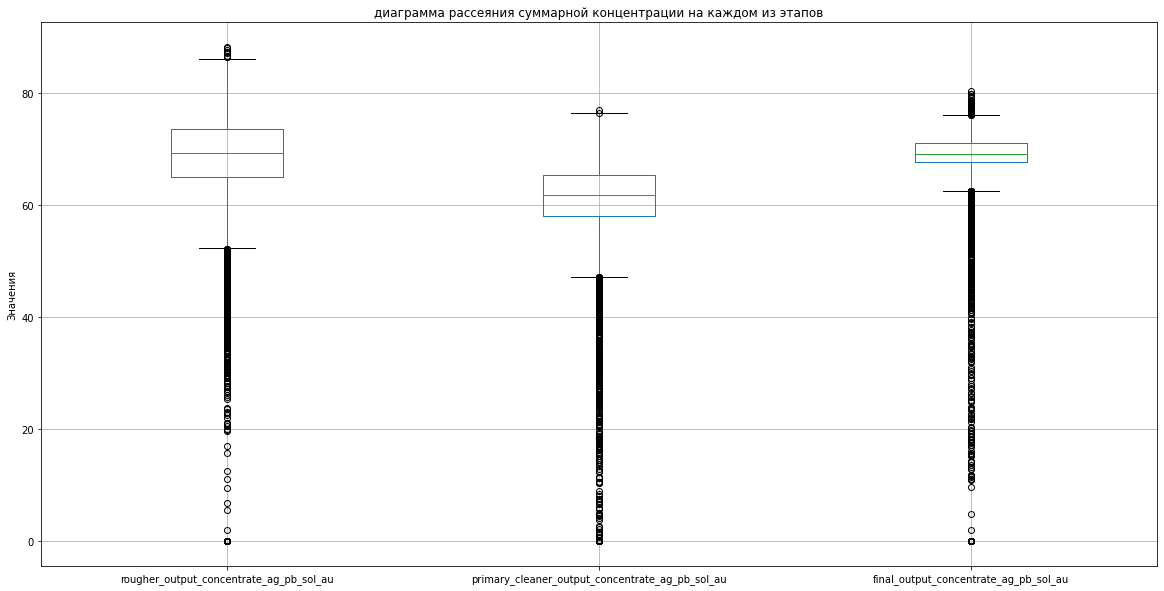

In [24]:
data_train[['rougher_output_concentrate_ag_pb_sol_au', 'primary_cleaner_output_concentrate_ag_pb_sol_au', 'final_output_concentrate_ag_pb_sol_au']].\
boxplot(figsize = (20,10))
plt.title('диаграмма рассеяния суммарной концентрации на каждом из этапов')
plt.ylabel('Значения')
plt.show()

По распределению видно, что присутствуют выбросы. Есть много значению от 0 до 40, которые можно удалить. Отсечем немного этих выбросов

In [26]:
data_train=data_train[data_train['rougher_output_concentrate_ag_pb_sol_au']>10]
data_train=data_train[data_train['primary_cleaner_output_concentrate_ag_pb_sol_au']>10]
data_train=data_train[data_train['final_output_concentrate_ag_pb_sol_au']>10]

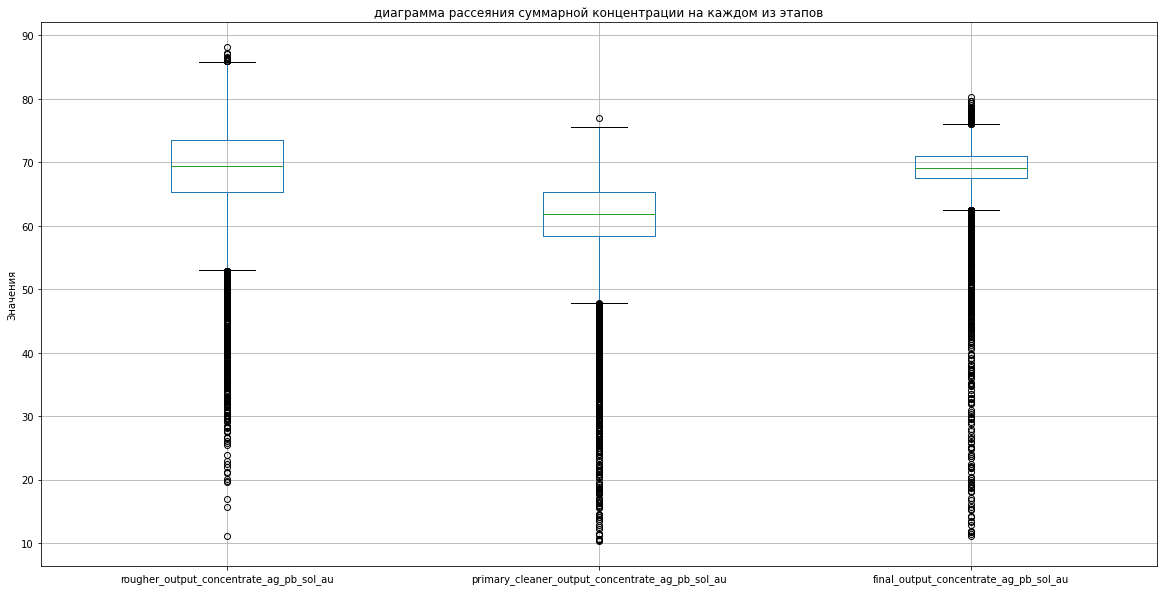

In [27]:
data_train[['rougher_output_concentrate_ag_pb_sol_au', 'primary_cleaner_output_concentrate_ag_pb_sol_au', 'final_output_concentrate_ag_pb_sol_au']].\
boxplot(figsize = (20,10))
plt.title('диаграмма рассеяния суммарной концентрации на каждом из этапов')
plt.ylabel('Значения')
plt.show()

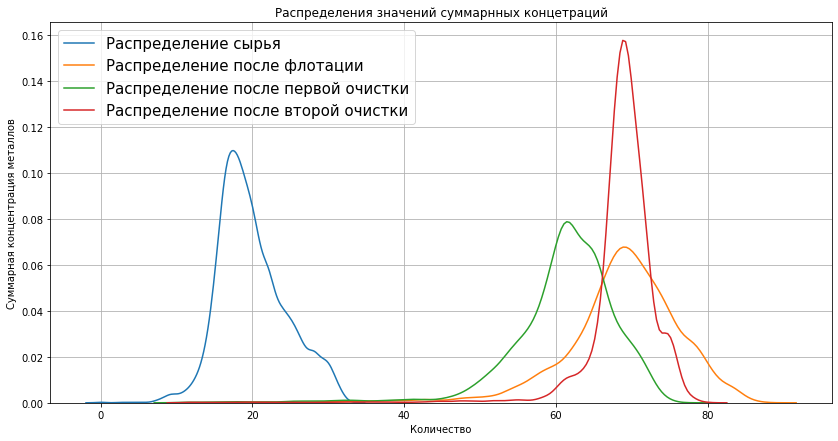

In [28]:
plt.subplots(figsize=(14, 7))

sns.kdeplot(label='Распределение сырья',
            data=rougher_input_data);

sns.kdeplot(label='Распределение после флотации',
            data=data_train['rougher_output_concentrate_ag_pb_sol_au']);

sns.kdeplot(label='Распределение после первой очистки',
            data=data_train['primary_cleaner_output_concentrate_ag_pb_sol_au']);

sns.kdeplot(label='Распределение после второй очистки',
            data=data_train['final_output_concentrate_ag_pb_sol_au']);

plt.legend(fontsize = 15)
plt.title("Распределения значений суммарнных концетраций")
plt.xlabel("Количество")
plt.ylabel("Суммарная концентрация металлов")
plt.grid(True)
plt.show;

[К оглавлению](#Оглавление)

### 4.3. Вывод по анализу данных<a name="Выводанализуданных"></a>
   
Анализ концентрации металлов показал, что концентрация золота значительно увеличивается на каждом этапе обработки сырья. Концентрация золота в отвалах тоже увеличивается, но при этом на порядок ниже чем в сырье. На всех графиках концентрации сырья видны значения равные нулю. Судя по распределению, это выбросы.
    
Построены графики распределения плотности вероятности значений размеров гранул на входе в этапы флотации и финальной очистки выборок train и test Сами распределения похожи, что говорит об однородности данных размеров сырья в выборках train и test

Бросается в глаза большой хвост выбросов для язначений от левого уса до нуля. Для всех суммарных концентраций значения левого уса рассчитаны. Удалены выбросы попадающие в этот промежуток в т.ч и в файле data_train

## 5. Сравнение моделей<a name="Сравнение_моделей"></a>

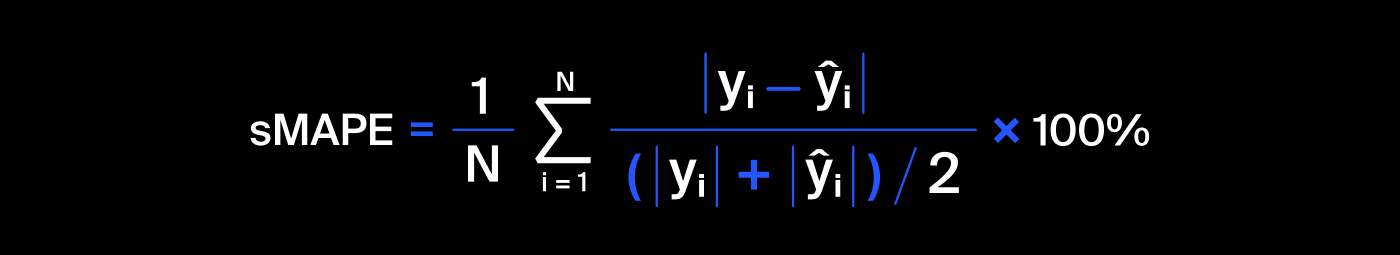

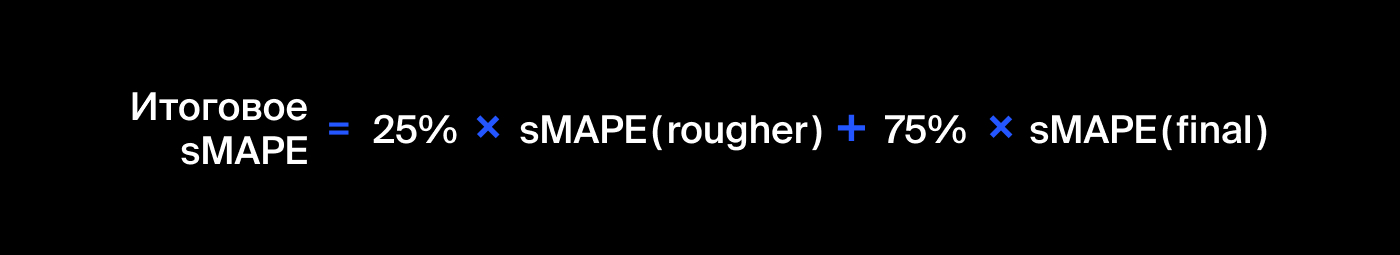

Создадим функции для расчета по формулам

In [29]:
def sMAPE(y_true,y_pred):
    error = np.mean(abs(y_true - y_pred)/((abs(y_true)+abs(y_pred))/2))*100
    return error

In [30]:
def final_sMAPE(sMAPE_rougher,sMAPE_final):
    return (0.25*sMAPE_rougher + 0.75*sMAPE_final)

In [31]:
smape_scorer = make_scorer(final_sMAPE, greater_is_better=False)

Избавимся от столбцов, которых нет в df_test

In [32]:
data_train.drop(test_missing_columns, axis=1, inplace=True)

Добавим необходимые столбцы

In [34]:
data_train = data_train.merge(data_full[['date', 'rougher.output.recovery', 'final.output.recovery']], how = 'left',on = 'date')
data_test = data_test.merge(data_full[['date', 'rougher.output.recovery', 'final.output.recovery']], how = 'left', on = 'date')

Посмотрим отсутствующие столбы

In [35]:
test_missing_columns = list(set(data_train.columns) - set(data_test.columns))
test_missing_columns

['primary_cleaner_output_concentrate_ag_pb_sol_au',
 'final_output_concentrate_ag_pb_sol_au',
 'rougher_output_concentrate_ag_pb_sol_au']

Избавимся от столбцов, которых нет в df_test

In [36]:
data_train.drop(test_missing_columns, axis=1, inplace=True)

Выделим целевой признак 

In [37]:
features_train_rougher = data_train.drop(['rougher.output.recovery', 'final.output.recovery', 'date'], axis=1)
features_train_final = data_train.drop(['rougher.output.recovery', 'final.output.recovery', 'date'], axis=1)

target_train_rougher = data_train['rougher.output.recovery']
target_train_final = data_train['final.output.recovery']

features_test_rougher = data_test.drop(['rougher.output.recovery', 'final.output.recovery', 'date'], axis=1)
features_test_final = data_test.drop(['rougher.output.recovery', 'final.output.recovery', 'date'], axis=1)

target_test_rougher = data_test['rougher.output.recovery']
target_test_final = data_test['final.output.recovery']

Объединим модели линейной регрессии, случайного леса в регрессии и решающего дерева в регрессии с масштабированием данных

In [38]:
model_LR = make_pipeline(StandardScaler(), LinearRegression())
model_DTR = make_pipeline(StandardScaler(), DecisionTreeRegressor(random_state=12345))
model_RFR = make_pipeline(StandardScaler(), RandomForestRegressor(random_state=12345))

[К оглавлению](#Оглавление)

### 5.1. LinearRegression<a name="LinearRegression"></a>

In [39]:
scorer = make_scorer(sMAPE, greater_is_better = False)
parameters_LR = {'linearregression__fit_intercept':[True], 'linearregression__normalize':[True]}
grid_rougher_LR = GridSearchCV(estimator=model_LR, param_grid=parameters_LR, cv=5, scoring=scorer)
grid_final_LR = GridSearchCV(estimator=model_LR, param_grid=parameters_LR, cv=5, scoring=scorer)
grid_rougher_LR.fit(features_train_rougher, target_train_rougher)
grid_final_LR.fit(features_train_final, target_train_final)
best_score_rougher_LR = grid_rougher_LR.best_score_
best_score_final_LR = grid_final_LR.best_score_

[К оглавлению](#Оглавление)

### 5.2. DecisionTreeRegressor<a name="DecisionTreeRegressor"></a>

Рассмотрим модель решающего дерева в регрессии и выберем для неё лучшие параметры

In [40]:
parameters_DTR = {'decisiontreeregressor__max_depth':[None] + [i for i in range(2, 11)]}
grid_rougher_DTR = GridSearchCV(estimator=model_DTR, param_grid=parameters_DTR, cv=5, scoring=scorer)
grid_final_DTR = GridSearchCV(estimator=model_DTR, param_grid=parameters_DTR, cv=5, scoring=scorer)
grid_rougher_DTR.fit(features_train_rougher, target_train_rougher)
grid_final_DTR.fit(features_train_final, target_train_final)
best_score_rougher_DTR = grid_rougher_DTR.best_score_
best_score_final_DTR = grid_final_DTR.best_score_

[К оглавлению](#Оглавление)

### 5.3. RandomForestRegressor<a name="RandomForestRegressor"></a>

Рассмотрим модель случайного леса в регрессии и выберем для неё лучшие параметры

In [41]:
parameters_RFR = {"randomforestregressor__n_estimators": [x for x in range(1, 50, 10)], 'randomforestregressor__max_depth':[i for i in range(2, 11)]}
grid_rougher_RFR = GridSearchCV(estimator=model_RFR, param_grid=parameters_RFR, cv=3, scoring=scorer, n_jobs=-1)
grid_final_RFR = GridSearchCV(estimator=model_RFR, param_grid=parameters_RFR, cv=3, scoring=scorer, n_jobs=-1)
grid_rougher_RFR.fit(features_train_rougher, target_train_rougher)
grid_final_RFR.fit(features_train_final, target_train_final)
best_score_rougher_RFR = grid_rougher_RFR.best_score_
best_score_final_RFR = grid_final_RFR.best_score_

In [42]:
print('Для параметра Rougher')
print('LinearRegression:', -best_score_rougher_LR)
print('DecisionTreeRegressor:', -best_score_rougher_DTR)
print('RandomForestRegressor:', -best_score_rougher_RFR)
print('Для параметра Final')
print('LinearRegression:', -best_score_final_LR)
print('DecisionTreeRegressor:', -best_score_final_DTR)
print('RandomForestRegressor:', -best_score_final_RFR)
print('Final sMAPE')
print('LinearRegression:', -final_sMAPE(best_score_rougher_LR, best_score_final_LR))
print('DecisionTreeRegressor:', -final_sMAPE(best_score_rougher_DTR, best_score_final_DTR))
print('RandomForestRegressor:', -final_sMAPE(best_score_rougher_RFR, best_score_final_RFR))

Для параметра Rougher
LinearRegression: 7.325404089860863
DecisionTreeRegressor: 6.911903091586019
RandomForestRegressor: 7.703333809076013
Для параметра Final
LinearRegression: 11.048877472902813
DecisionTreeRegressor: 9.234847089915617
RandomForestRegressor: 9.845636652020254
Final sMAPE
LinearRegression: 10.118009127142324
DecisionTreeRegressor: 8.654111090333217
RandomForestRegressor: 9.310060941284194


Лучшая модель - модель случайного леса в регрессии, проверим на ней тестовую выборку

In [43]:
test_rougher_RFR = grid_rougher_RFR.predict(features_test_rougher)
test_final_RFR = grid_final_RFR.predict(features_test_final)
print('Final sMAPE for test:', final_sMAPE(sMAPE(target_test_rougher, test_rougher_RFR),
                                           sMAPE(target_test_final, test_final_RFR)))

Final sMAPE for test: 9.10024005943878


[К оглавлению](#Оглавление)

## 6. Сравнение с константной моделью<a name="Сравнение"></a>

Создание константной модели 

In [44]:
dummy_mean_rougher = DummyRegressor(strategy='mean')
dummy_mean_final = DummyRegressor(strategy='mean')
dummy_median_rougher = DummyRegressor(strategy='median')
dummy_median_final = DummyRegressor(strategy='median')

In [45]:
dummy_mean_rougher.fit(features_train_rougher, target_train_rougher)
dummy_mean_final.fit(features_train_final, target_train_final)
dummy_median_rougher.fit(features_train_rougher, target_train_rougher)
dummy_median_final.fit(features_train_final, target_train_final)

DummyRegressor(strategy='median')

In [46]:
DummyRegressor(strategy='median')

DummyRegressor(strategy='median')

Предскажем наши значения

In [47]:
dummy_mean_rougher_predict = dummy_mean_rougher.predict(features_test_rougher)
dummy_mean_final_predict = dummy_mean_final.predict(features_test_final)
dummy_median_rougher_predict = dummy_median_rougher.predict(features_test_rougher)
dummy_median_final_predict = dummy_median_final.predict(features_test_final)

Посмотрим ошибку метрики для среднего и медианного

In [48]:
print('Final sMAPE for dummy mean:', final_sMAPE(sMAPE(target_test_rougher, dummy_mean_rougher_predict),
                                           sMAPE(target_test_final, dummy_mean_final_predict)))
print('Final sMAPE for dummy median:', final_sMAPE(sMAPE(target_test_rougher, dummy_median_rougher_predict),
                                           sMAPE(target_test_final, dummy_median_final_predict)))

Final sMAPE for dummy mean: 9.834706655230413
Final sMAPE for dummy median: 9.452487971891792


Наилучшей моделью среди модели линейного регрессии, дерева решений в регрессии и случайного леса в регрессии оказалась последняя модель. Её финальное sMAPE было меньше всего 8.297.

[К оглавлению](#Оглавление)

## 7. Вывод<a name="Вывод"></a>

В исследовании участвовали три различные модели прогнозирования: Случайный Лес, Решающее Дерево и Линейная Регрессия.

По результатам исследования можем сделать следующие выводы:

- в ходе предобработки и анализа полученных данных были обработаны пропуски, удалены промежуточные значения
- проверена формула вычисления эффективности обогащения на соответствие действительности
- исследованы изменения концентрации элементов на каждом этапе очистки
- после каждого этапа очистки концентрация золота значительно возрастает
- концентрация серебра повысилась только после флотации, на последующих этапах очистки прослеживается тенденция к снижению. 
- концентрация свинца значительно повысилась после флотации, при последующей очистке повышение не такое явное
- суммарная концентрация металлов стабильно повышается после прохождения каждого этапа очистки
- распределения размеров гранул сырья в выборках схожи, никаких корректировок вносить не требуется
- обучены разные модели и оценено их качество кросс-валидацией и подсчётом метрики sMAPE (симметричное среднее абсолютное процентное отклонение)
- Лучшая модель - модель случайного леса в регрессии